In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df = pd.read_csv("linearRegression.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape


(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

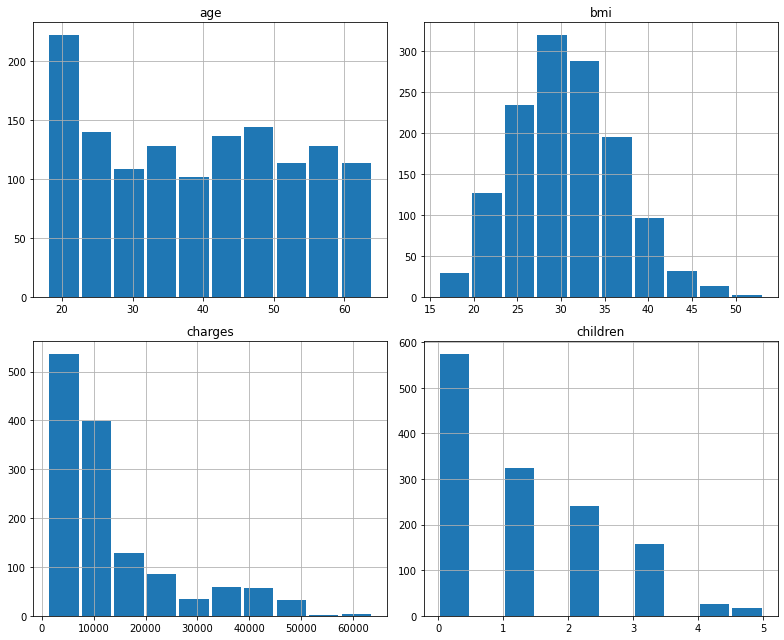

In [11]:
df.hist(rwidth=0.9,figsize=(11,9))
plt.tight_layout() 

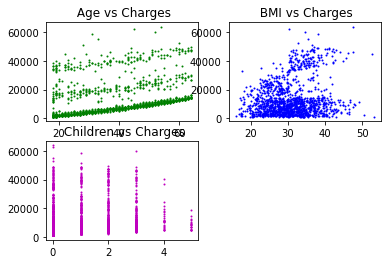

In [14]:
plt.subplot(2,2,1)
plt.title(" Age vs Charges")
plt.scatter(df['age'],df['charges'],s=1,c='g')


plt.subplot(2,2,2)
plt.title(" BMI vs Charges")
plt.scatter(df['bmi'],df['charges'],s=1,c='b')


plt.subplot(2,2,3)
plt.title(" Children vs Charges")
plt.scatter(df['children'],df['charges'],s=1,c='m')



In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
correlation=df[['age','bmi','children','charges']].corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [22]:
clrs=['g','b','m']

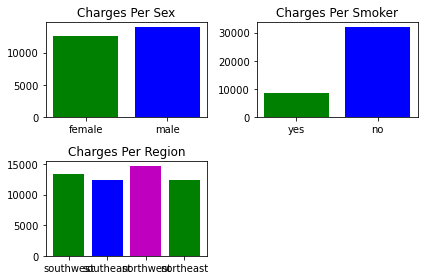

In [39]:
plt.subplot(2,2,1)
plt.title('Charges Per Sex')
cat_list=df['sex'].unique()
cat_avg=df.groupby('sex').mean()['charges']
plt.bar(cat_list,cat_avg,color=clrs)


plt.subplot(2,2,2)
plt.title('Charges Per Smoker')
cat_list=df['smoker'].unique()
cat_avg=df.groupby('smoker').mean()['charges']
plt.bar(cat_list,cat_avg,color=clrs)

plt.subplot(2,2,3)
plt.title('Charges Per Region')
cat_list=df['region'].unique()
cat_avg=df.groupby('region').mean()['charges']
plt.bar(cat_list,cat_avg,color=clrs)

plt.tight_layout()

In [41]:
df_car =df.select_dtypes(include =[object])

In [42]:
df_num =df.select_dtypes(include = [np.number])

In [43]:
df_car


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [44]:
df_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [45]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
df_car = df_car.apply(le.fit_transform)

In [49]:
df_car

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [51]:
df_final = pd.concat([df_num,df_car],axis=1)

In [52]:
df_final

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [56]:
x=df_final[['age','bmi','sex','smoker']]

In [57]:
x

,age,bmi,sex,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0
...,...,...,...,...
1333,50,30.970,1,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [58]:
y=df_final[['charges']]

In [59]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression() 

In [70]:
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
fit = lr.fit(x_train,y_train)

In [72]:
fit.score(x_train,y_train)

0.7433784807551698

In [75]:
prediction=lr.predict([[61,29.070,0,1]])

In [76]:
prediction

array([[37319.84862988]])